# Nearest node function

Notebook that tests the nearest node function and the new distance functions.

## Import used modules

In [27]:
import os
import sys

import pandas as pd
import geopandas as gpd
import osmnx as ox
import time
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

## Download municipality GeoDataFrame

In [28]:
#gdf = aup.gdf_from_db("mpos_2020", "marco")
mpos = ['01001','01005','01011']
mun_gdf = gpd.GeoDataFrame()
hex_bins = gpd.GeoDataFrame()
for m in mpos:
    query = f"SELECT * FROM marco.mpos_2020 WHERE \"CVEGEO\" LIKE \'{m}\'"
    mun_gdf = mun_gdf.append(aup.gdf_from_query(query, geometry_col='geometry'))
    query = f"SELECT * FROM hexgrid.hex_grid WHERE \"CVEGEO\" LIKE \'{m}%%\'"
    hex_bins = hex_bins.append(aup.gdf_from_query(query, geometry_col='geometry'))
mun_gdf.head(1)

,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,geometry
0,01001,01,001,Aguascalientes,"POLYGON ((-102.10641 22.06035, -102.10368 22.0..."


<AxesSubplot:>

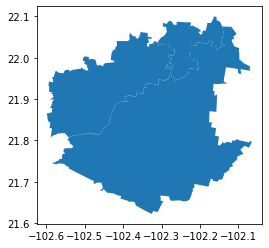

In [29]:
mun_gdf.plot()

In [30]:
print(hex_bins.shape)
hex_bins.head(2)

(2088, 3)


,geometry,hex_id_8,CVEGEO
0,"POLYGON ((-102.31835 21.82096, -102.31376 21.8...",88498eacd7fffff,01001
1,"POLYGON ((-102.11473 21.78362, -102.11014 21.7...",88498e3205fffff,01001


<AxesSubplot:>

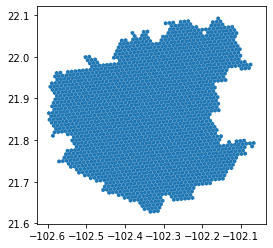

In [31]:
hex_bins.plot()

## Download OSMnx

In [32]:
_, nodes, edges = aup.graph_from_hippo(mun_gdf, 'osmnx_new')

(50110, 4)


<AxesSubplot:>

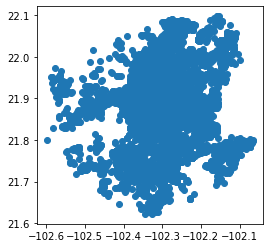

In [33]:
print(nodes.shape)
nodes.plot()

(117769, 15)


<AxesSubplot:>

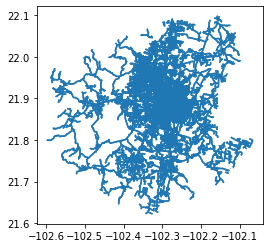

In [34]:
print(edges.shape)
edges.plot()

In [35]:
tmp = edges.reset_index().merge(nodes.reset_index().rename(columns={'osmid':'osmid_v'})['osmid_v'],
                                left_on=['v'], right_on=['osmid_v'], how='left')
tmp = tmp.merge(nodes.reset_index().rename(columns={'osmid':'osmid_u'})['osmid_u'],
                left_on=['u'], right_on=['osmid_u'], how='left')

In [36]:
tmp['id_tmp'] = tmp.osmid_v + tmp.osmid_u
tmp.id_tmp.isna().sum()

0

In [37]:
edges_tmp = tmp[['u','v','key','osmid','length','id_tmp','geometry']].dropna()
edges.shape

(117769, 15)

In [40]:
edges

osmid  oneway lanes              name  \
u          v          key                                              
1108846796 1588084638 0    910361578   False  None              None   
           1585708618 0     95629284   False  None  Paseo del Molino   
           1585708616 0     95629284   False  None  Paseo del Molino   
1108846806 1585708618 0     95629284   False  None  Paseo del Molino   
1585708616 1108846796 0     95629284   False  None  Paseo del Molino   
...                              ...     ...   ...               ...   
8451896608 3152210300 0    910330493   False  None              None   
8451936020 8451844034 0    910325204   False  None              None   
8452117511 8451844034 0    910353291   False  None              None   
8725502462 8444559326 0    909504519   False  None              None   
           8725502463 0    942262967   False  None              None   

                               highway maxspeed   length  \
u          v          key                                  
1108846796 1588084638 0    residential     None    9.831   
           1585708618 0      secondary       60  286.001   
           1585708616 0      secondary       60  153.253   
1108846806 1585708618 0      secondary       60  214.211   
1585708616 1108846796 0      secondary       60  153.253   
...                                ...      ...      ...   
8451896608 3152210300 0    residential     None  162.614   
8451936020 8451844034 0    residential     None  615.871   
8452117511 8451844034 0        service     None  262.844   
8725502462 8444559326 0        service     None  238.910   
           8725502463 0           path     None  109.929   

                                                                    geometry  \
u          v          key                                                      
1108846796 1588084638 0    LINESTRING (-102.35744 21.83723, -102.35744 21...   
           1585708618 0    LINESTRING (-102.35744 21.83723, -102.35733 21...   
           1585708616 0    LINESTRING (-102.35744 21.83723, -102.35878 21...   
1108846806 1585708618 0    LINESTRING (-102.35450 21.84017, -102.35451 21...   
1585708616 1108846796 0    LINESTRING (-102.35892 21.83712, -102.35878 21...   
...                                                                      ...   
8451896608 3152210300 0    LINESTRING (-102.31712 21.99709, -102.31697 21...   
8451936020 8451844034 0    LINESTRING (-102.31934 22.00339, -102.31958 22...   
8452117511 8451844034 0    LINESTRING (-102.31626 22.00278, -102.31648 22...   
8725502462 8444559326 0    LINESTRING (-102.31809 21.99129, -102.31830 21...   
           8725502463 0    LINESTRING (-102.31809 21.99129, -102.31703 21...   

                          bridge     ref junction tunnel access width service  
u          v          key                                                      
1108846796 1588084638 0     None    None     None   None   None  None    None  
           1585708618 0     None  AGS 31     None   None   None  None    None  
           1585708616 0     None  AGS 31     None   None   None  None    None  
1108846806 1585708618 0     None  AGS 31     None   None   None  None    None  
1585708616 1108846796 0     None  AGS 31     None   None   None  None    None  
...                          ...     ...      ...    ...    ...   ...     ...  
8451896608 3152210300 0     None    None     None   None   None  None    None  
8451936020 8451844034 0     None    None     None   None   None  None    None  
8452117511 8451844034 0     None    None     None   None   None  None    None  
8725502462 8444559326 0     None    None     None   None   None  None    None  
           8725502463 0     None    None     None   None   None  None    None  

[117769 rows x 15 columns]

In [44]:
G = ox.graph_from_gdfs(nodes,edges_tmp.set_index(['u','v','key']))

In [45]:
nodes_G, edges_G = ox.graph_to_gdfs(G)

In [47]:
edges_G

osmid   length       id_tmp  \
u          v          key                                    
1108846796 1588084638 0    910361578    9.831   2696931434   
           1585708618 0     95629284  286.001   2694555414   
           1585708616 0     95629284  153.253   2694555412   
1588084638 1108846796 0    910361578    9.831   2696931434   
           1585708616 0    145389705  164.821   3173793254   
...                              ...      ...          ...   
8451844034 8451844041 0    910325204  113.309  16903688075   
           8452117511 0    910353291  262.844  16903961545   
8451936020 8451844034 0    910325204  615.871  16903780054   
8452117511 8451844034 0    910353291  262.844  16903961545   
8451844042 8451844046 0    910325205   64.416  16903688088   

                                                                    geometry  
u          v          key                                                     
1108846796 1588084638 0    LINESTRING (-102.35744 21.83723, -102.35744 21...  
           1585708618 0    LINESTRING (-102.35744 21.83723, -102.35733 21...  
           1585708616 0    LINESTRING (-102.35744 21.83723, -102.35878 21...  
1588084638 1108846796 0    LINESTRING (-102.35744 21.83714, -102.35744 21...  
           1585708616 0    LINESTRING (-102.35744 21.83714, -102.35776 21...  
...                                                                      ...  
8451844034 8451844041 0    LINESTRING (-102.31679 22.00048, -102.31665 22...  
           8452117511 0    LINESTRING (-102.31679 22.00048, -102.31665 22...  
8451936020 8451844034 0    LINESTRING (-102.31934 22.00339, -102.31958 22...  
8452117511 8451844034 0    LINESTRING (-102.31626 22.00278, -102.31648 22...  
8451844042 8451844046 0    LINESTRING (-102.31569 22.00103, -102.31580 22...  

[117769 rows x 4 columns]

## Amenities

In [10]:
cod_act = {'farmacia':[464111,464112]}

In [11]:
gdf_tmp = mun_gdf.copy()
gdf_tmp = gdf_tmp.to_crs("EPSG:6372")
gdf_tmp = gdf_tmp.buffer(1).reset_index().rename(columns={0:'geometry'})
gdf_tmp = gdf_tmp.to_crs("EPSG:4326")
poly_wkt = gdf_tmp.dissolve().geometry.to_wkt()[0]

for a in cod_act:
            denue_amenity = gpd.GeoDataFrame()
            for cod in cod_act[a]:
                query = f"SELECT * FROM denue_nodes.denue_node_2020 WHERE (ST_Intersects(geometry, \'SRID=4326;{poly_wkt}\')) AND (\"codigo_act\" = {cod})"
                denue_amenity = denue_amenity.append(aup.gdf_from_query(query, geometry_col='geometry'))

In [12]:
print(denue_amenity.shape)
denue_amenity.head(2)

(386, 5)


,id,codigo_act,geometry,osmid,distance_node
0,23279.0,464111.0,POINT (-102.29652 21.87624),8578029075,27.489211
1,8217258.0,464111.0,POINT (-102.24998 21.91527),1760549310,28.647746


<AxesSubplot:>

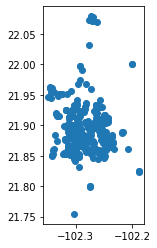

In [13]:
denue_amenity.plot()

## Calculating distance to amenities

In [14]:
nodes_distance = aup.calculate_distance_nearest_poi(denue_amenity, nodes.copy(), edges.copy(), a, 'osmid')
print(nodes_distance.shape)
nodes_distance.head(2)

(50052, 5)


,x,y,street_count,geometry,dist_farmacia
osmid,,,,,
272921360,-102.295073,21.872876,3,POINT (-102.29507 21.87288),334.213
272921393,-102.295097,21.871411,4,POINT (-102.29510 21.87141),183.576


<AxesSubplot:>

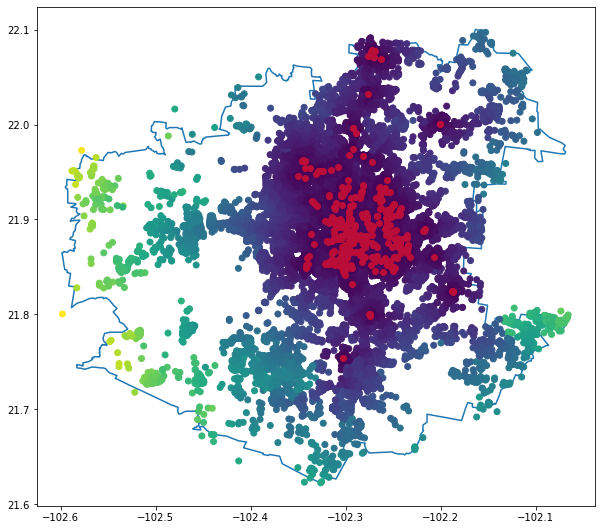

In [15]:
fig,ax = plt.subplots(figsize=(10,10))
denue_amenity.plot(ax=ax, color='#ba0d38',zorder=1)
nodes_distance.plot(nodes_distance['dist_'+a], ax=ax, zorder=-1)
mun_gdf.dissolve().boundary.plot(ax=ax, zorder=-2)

### Distance to hex_bins

In [16]:
nodes_distance.reset_index(inplace=True)
hex_bins = hex_bins.to_crs("EPSG:4326")
hex_dist = aup.group_by_hex_mean(nodes_distance,hex_bins,8,'farmacia')
hex_dist.head(2)

,geometry,hex_id_8,CVEGEO,x,y,street_count,dist_farmacia
0,"POLYGON ((-102.31835 21.82096, -102.31376 21.8...",88498eacd7fffff,01001,-102.320189,21.826943,2.836735,3709.637939
1,"POLYGON ((-102.13473 21.73731, -102.13522 21.7...",88498ea8abfffff,01001,0.000000,0.000000,0.000000,0.000000


<AxesSubplot:>

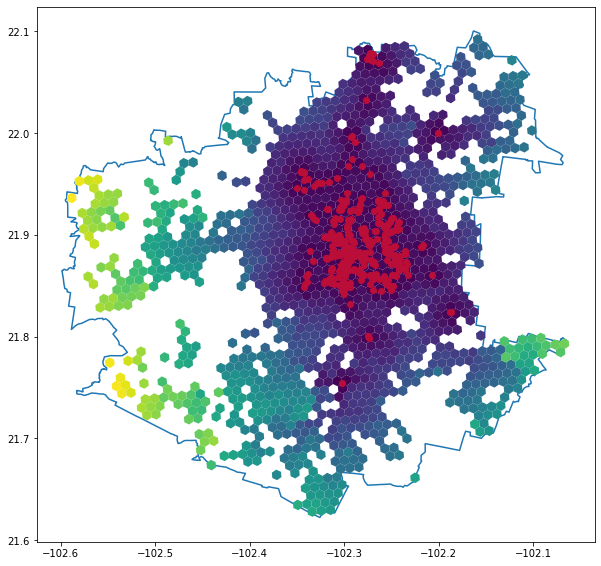

In [17]:
fig,ax = plt.subplots(figsize=(10,10))
denue_amenity.plot(ax=ax, color='#ba0d38',zorder=1)
mun_gdf.dissolve().boundary.plot(ax=ax, zorder=-2)
hex_dist.loc[hex_dist.dist_farmacia>0].plot(hex_dist.loc[hex_dist.dist_farmacia>0]['dist_'+a], ax=ax, zorder=-1)

### Data analysis

In [18]:
print('mean',hex_dist.loc[hex_dist.dist_farmacia>0]['dist_'+a].mean(),
      'std',hex_dist.loc[hex_dist.dist_farmacia>0]['dist_'+a].std())

mean 8317.453473431902 std 7576.699389637319


<AxesSubplot:>

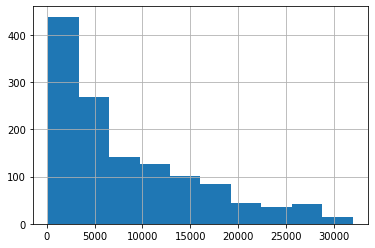

In [19]:
hex_dist.loc[hex_dist.dist_farmacia>0]['dist_'+a].hist()

## Testing for all ammenities

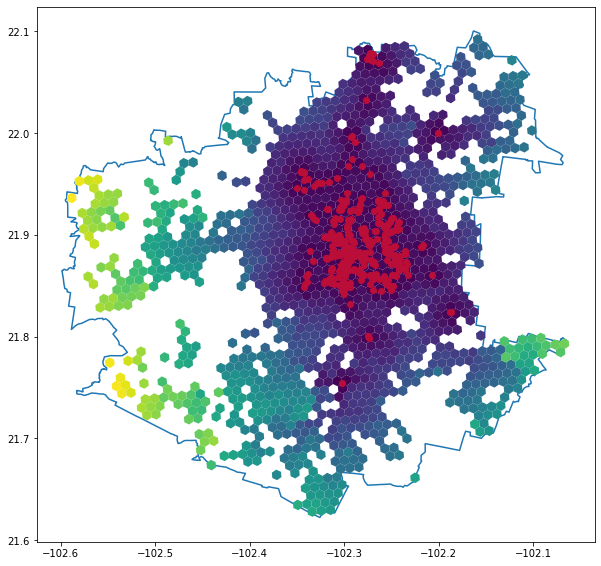

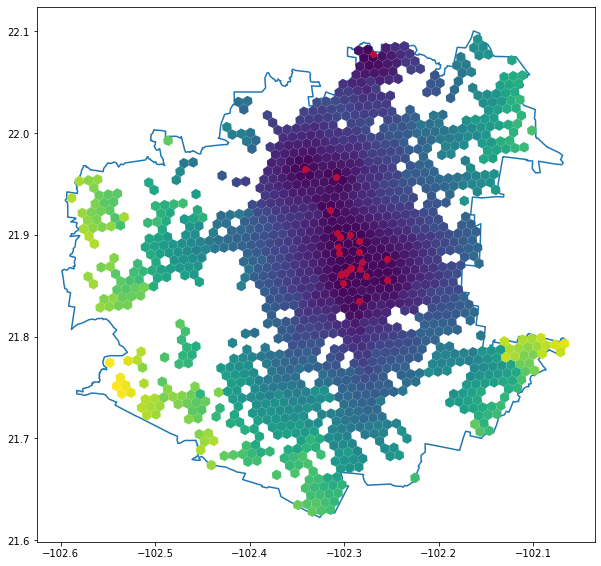

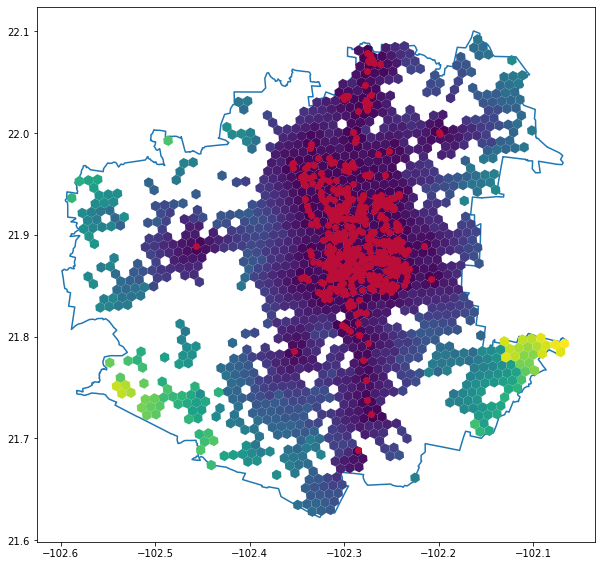

In [24]:
amenities = {'farmacia':[464111,464112],'hospitales':[622111,622112], 
    'supermercados':[462111,462112]}
resolution = 8
#Creates wkt for query
gdf_tmp = mun_gdf.copy()
gdf_tmp = gdf_tmp.to_crs("EPSG:6372")
gdf_tmp = gdf_tmp.buffer(1).reset_index().rename(columns={0:'geometry'})
gdf_tmp = gdf_tmp.to_crs("EPSG:4326")
poly_wkt = gdf_tmp.dissolve().geometry.to_wkt()[0]
aup.log("Created wkt based on dissolved polygon")

nodes_amenities = gpd.GeoDataFrame()
i = 0

for a in amenities:
    denue_amenity = gpd.GeoDataFrame()
    for cod in amenities[a]:
        query = f"SELECT * FROM denue_nodes.denue_node_2020 WHERE (ST_Intersects(geometry, \'SRID=4326;{poly_wkt}\')) AND (\"codigo_act\" = {cod})"
        denue_amenity = denue_amenity.append(aup.gdf_from_query(query, geometry_col='geometry'))

    nodes_distance = aup.calculate_distance_nearest_poi(denue_amenity, nodes.copy(), edges.copy(), a, 'osmid')

    #Data to hex_bins
    nodes_distance.reset_index(inplace=True)
    hex_dist = aup.group_by_hex_mean(nodes_distance, hex_bins, resolution, a)
    hex_bins = hex_bins.merge(hex_dist[['hex_id_'+str(resolution),'dist_'+a]], on='hex_id_'+str(resolution))

    if i == 0:
        nodes_amenities = nodes_distance[['osmid','x','y','dist_'+a,'geometry']]
    else:
        nodes_amenities = nodes_amenities.merge(
            nodes_distance[['osmid','dist_'+a]], on='osmid')
    i += 1
    
    fig,ax = plt.subplots(figsize=(10,10))
    denue_amenity.plot(ax=ax, color='#ba0d38',zorder=1)
    mun_gdf.dissolve().boundary.plot(ax=ax, zorder=-2)
    hex_dist.loc[hex_dist['dist_'+a]>0].plot(hex_dist.loc[hex_dist['dist_'+a]>0]['dist_'+a], ax=ax, zorder=-1)
    plt.show()